In [1]:
!pip install tabula-py
print ('tabula-py installed')

tabula-py installed


In [2]:
!conda install -c conda-forge folium=0.5.0 --yes
print ('folium installed')

Solving environment: done

# All requested packages already installed.

folium installed


In [ ]:
!conda install -c conda-forge geopy --yes
print ('geopy installed')

Solving environment: / 

In [4]:
!pip install matplotlib

In [5]:
!pip install -U scikit-learn

     |████████████████████████████████| 7.1MB 5.8MB/s eta 0:00:01
     |████████████████████████████████| 296kB 50.9MB/s eta 0:00:01
ERROR: autoai-libs 1.10.5 has requirement numpy>=1.16.4, but you'll have numpy 1.15.4 which is incompatible.
ERROR: autoai-libs 1.10.5 has requirement scikit-learn==0.20.3, but you'll have scikit-learn 0.22.2.post1 which is incompatible.
  Found existing installation: scikit-learn 0.20.3
    Uninstalling scikit-learn-0.20.3:
      Successfully uninstalled scikit-learn-0.20.3


In [6]:
import tabula
from tabula import read_pdf
from tabula import convert_into

import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib as mpl
import matplotlib.pyplot as plt



#import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [7]:
# The code was removed by Watson Studio for sharing.

,Figure i. Number of Counted Homeless Persons by County and Percentage of State Total,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,County,Total\rHomeless\rPersons,% of Total\rHomeless\rPersons,Chronic\rHomeless\rPersons,% of\rChronic\rHomeless\rPersons,Unsheltered\rHomeless\rPersons,% of\rUnsheltered\rHomeless\rPersons
1,Atlantic,437,0.05,105,0.08,131,0.08
2,Bergen,354,0.04,11,0.01,23,0.01
3,Burlington,840,0.09,81,0.06,56,0.03
4,Camden,577,0.06,100,0.08,84,0.05
5,Cape May,103,0.01,13,0.01,8,0
6,Cumberland,156,0.02,25,0.02,35,0.02
7,Essex,2229,0.24,250,0.19,396,0.24
8,Gloucester,144,0.02,8,0.01,18,0.01
9,Hudson,860,0.09,226,0.17,243,0.15


In [8]:
df_NJ_homeless.drop([df_NJ_homeless.index[0]], inplace = True)
df_NJ_homeless.drop(['Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6'], 1, inplace = True)
df_NJ_homeless.rename(columns = {'Figure i. Number of Counted Homeless Persons by County and Percentage of State Total' : 'County', 'Unnamed: 1' : 'Homeless Persons', 'Unnamed: 2' : 'Percentage'}, inplace = True)
df_NJ_homeless['Homeless Persons'] = df_NJ_homeless['Homeless Persons'].str.replace(',', '')
df_NJ_homeless['Homeless Persons'] = pd.to_numeric(df_NJ_homeless['Homeless Persons'])
df_NJ_homeless

,County,Homeless Persons,Percentage
1,Atlantic,437,0.05
2,Bergen,354,0.04
3,Burlington,840,0.09
4,Camden,577,0.06
5,Cape May,103,0.01
6,Cumberland,156,0.02
7,Essex,2229,0.24
8,Gloucester,144,0.02
9,Hudson,860,0.09
10,Hunterdon,169,0.02


In [9]:
df_NJ_homeless.drop([df_NJ_homeless.index[21]], inplace = True)
df_NJ_homeless.drop(['Percentage'], 1, inplace = True)
df_NJ_homeless.set_index('County', inplace=True)
df_NJ_homeless_proj = df_NJ_homeless.nlargest(1, ['Homeless Persons'])
df_NJ_homeless_proj

,Homeless Persons
County,
Essex,2229


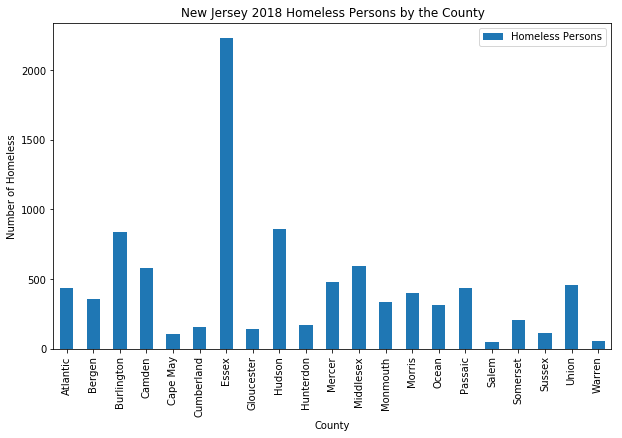

In [10]:
df_NJ_homeless.plot(kind='bar', figsize=(10, 6))

plt.xlabel('County') # add to x-label to the plot
plt.ylabel('Number of Homeless') # add y-label to the plot
plt.title('New Jersey 2018 Homeless Persons by the County') # add title to the plot

plt.show()

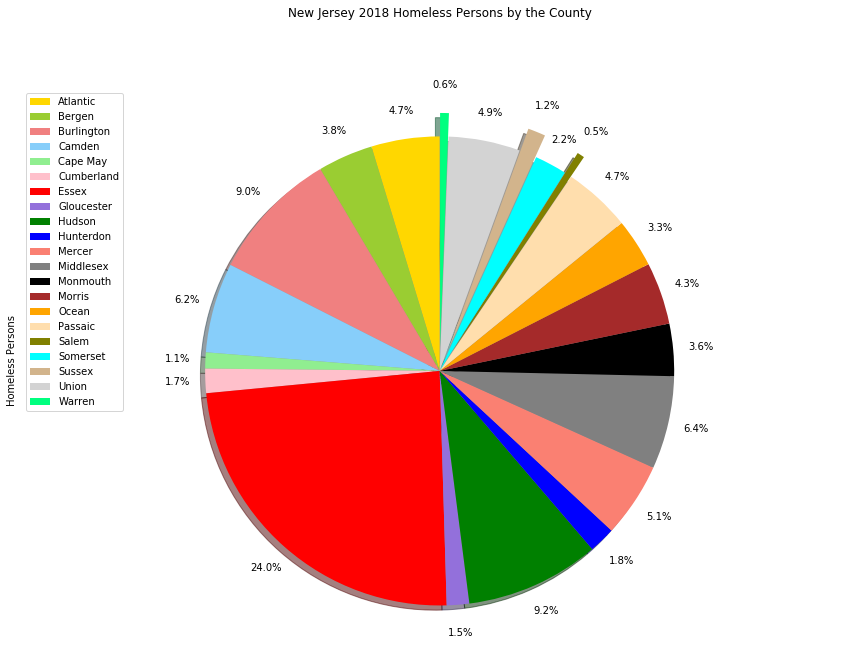

In [11]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen',
               'pink','red', 'mediumpurple', 'green','blue',
               'salmon', 'grey', 'black', 'brown','orange',
               'navajowhite', 'olive', 'cyan', 'tan', 'lightgray',
                'springgreen']
explode_list = [0, 0, 0, 0, 0,
                0, 0, 0, 0, 0,
                0, 0, 0, 0, 0,
                0, 0.1, 0, 0.1, 0,
                0.1] 

df_NJ_homeless['Homeless Persons'].plot(kind='pie',
                            figsize=(15, 10),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,
                            pctdistance=1.12,   
                            colors=colors_list,
                            explode=explode_list
                            )

# scale the title up by 12% to match pctdistance
plt.title('New Jersey 2018 Homeless Persons by the County', y=1.12) 
plt.axis('equal') 

# add legend
plt.legend(labels=df_NJ_homeless.index, loc='upper left') 

plt.show()

In [12]:

body = client_1e98d7e006194be1b6f357c229c1c2ff.get_object(Bucket='mycapstoneprojectweek2-donotdelete-pr-rga6hxdgkzhawg',Key='EssexHomeless.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
df_Essex_homeless = pd.read_csv(body)
df_Essex_homeless


,Figure i. Number of Homeless Persons by Municipality and Percentage of County Total,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,Municipality,Total\rHomeless\rPersons,%of Total\rHomeless\rPersons,Sheltered\rHomeless\rPersons,%of\rSheltered\rHomeless\rPersons,Unsheltered\rHomeless\rPersons,%of\rUnsheltered\rHomeless\rPersons,NaN
1,Belleville,2,0%,0,0%,2,1%,NaN
2,Bloomfield,8,0%,0,0%,8,2%,NaN
3,City of Orange,18,1%,12,1%,6,2%,NaN
4,East Orange,95,4%,71,4%,24,6%,NaN
5,Fairfield,1,0%,0,0%,1,0%,NaN
6,Irvington,65,3%,53,3%,12,3%,NaN
7,Montclair,70,3%,54,3%,16,4%,NaN
8,Newark,1928,88%,1608,89%,320,81%,NaN
9,North\rCaldwell,1,0%,0,0%,1,0%,NaN


In [13]:
df_Essex_homeless.drop(['Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6'], 1, inplace = True)
df_Essex_homeless.rename(columns = {'Figure i. Number of Homeless Persons by Municipality and Percentage of County Total' : 'Municipality', 'Unnamed: 1' : 'Homeless Persons', 'Unnamed: 2' : 'Percentage'}, inplace = True)
df_Essex_homeless['Homeless Persons'] = df_Essex_homeless['Homeless Persons'].str.replace(',', '')
df_Essex_homeless.drop([df_Essex_homeless.index[0]], inplace = True)
df_Essex_homeless['Homeless Persons'] = pd.to_numeric(df_Essex_homeless['Homeless Persons'])
df_Essex_homeless

,Municipality,Homeless Persons,Percentage,Unnamed: 7
1,Belleville,2,0%,NaN
2,Bloomfield,8,0%,NaN
3,City of Orange,18,1%,NaN
4,East Orange,95,4%,NaN
5,Fairfield,1,0%,NaN
6,Irvington,65,3%,NaN
7,Montclair,70,3%,NaN
8,Newark,1928,88%,NaN
9,North\rCaldwell,1,0%,NaN
10,South Orange,14,1%,NaN


In [14]:
df_Essex_homeless.drop([df_Essex_homeless.index[11]], inplace = True)
df_Essex_homeless.set_index('Municipality', inplace=True)
df_Essex_homeless_proj = df_Essex_homeless.nlargest(1, ['Homeless Persons'])
df_Essex_homeless_proj

,Homeless Persons,Percentage,Unnamed: 7
Municipality,,,
Newark,1928,88%,NaN


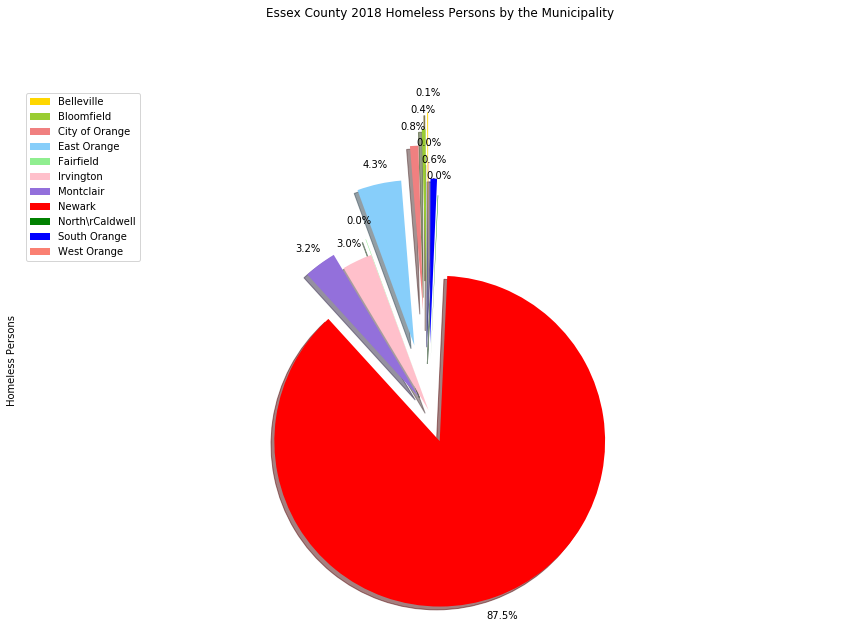

In [15]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen',
               'pink','mediumpurple','red', 'green','blue',
               'salmon']
explode_list = [0.8, 0.7, 0.6, 0.4, 0.1,
                0, 0.1, 0.2, 0.3
                , 0.4,
                0.5, ] 

df_Essex_homeless['Homeless Persons'].plot(kind='pie',
                            figsize=(15, 10),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,
                            pctdistance=1.12,   
                            colors=colors_list,
                            explode=explode_list
                            )

# scale the title up by 12% to match pctdistance
plt.title('Essex County 2018 Homeless Persons by the Municipality', y=1.12) 
plt.axis('equal') 

# add legend
plt.legend(labels=df_Essex_homeless.index, loc='upper left') 

plt.show()

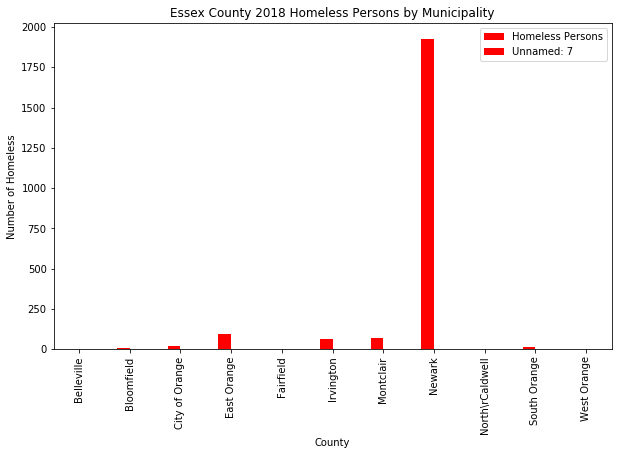

In [16]:
df_Essex_homeless.plot(kind='bar', color='red', figsize=(10, 6))

plt.xlabel('County') # add to x-label to the plot
plt.ylabel('Number of Homeless') # add y-label to the plot
plt.title('Essex County 2018 Homeless Persons by Municipality') # add title to the plot

plt.show()

In [17]:
Municipality_homeless = df_Essex_homeless_proj.index.values
Municipality_homeless = Municipality_homeless[0].upper()
Municipality_homeless

'NEWARK'

In [ ]:
body = client_1e98d7e006194be1b6f357c229c1c2ff.get_object(Bucket='mycapstoneprojectweek2-donotdelete-pr-rga6hxdgkzhawg',Key='GJUMC.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
df_GJUMC = pd.read_csv(body)
df_GJUMC.head()


In [19]:

body = client_1e98d7e006194be1b6f357c229c1c2ff.get_object(Bucket='mycapstoneprojectweek2-donotdelete-pr-rga6hxdgkzhawg',Key='GJUMCHomeless.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
df_GJUMC_homeless = pd.read_csv(body)
df_GJUMC_homeless


,TOWN,CHURCH NAME,CHURCH NUMBER,DISTRICT,Unnamed: 4
0,NEWARK,Franklin-St John's UMC (Newark),4043,Gateway North,NaN
1,NEWARK,St Matthew's UMC (Newark),4044,Gateway North,NaN
2,NEWARK,St Paul's Centenary UMC (Newark),4045,Gateway North,NaN
3,NEWARK,Trinity UMC (Newark),4046,Gateway North,NaN


In [20]:
df_GJUMC_homeless.loc[:,'ADDRESS'] = ['142 Maple Ave, Newark, NJ 07112',
                                      '150 S Orange Ave, Newark, NJ 07103',
                                      '741 Mt Prospect Ave, Newark, NJ 07104',
                                      '581 Clinton Ave, Newark, NJ 07108']

df_GJUMC_homeless.loc[:,'CHURCH NAME'] = df_GJUMC_homeless['CHURCH NAME'].str.replace('Newark','').str.replace('(','').str.replace(')','').str.rstrip()
df_GJUMC_homeless

,TOWN,CHURCH NAME,CHURCH NUMBER,DISTRICT,Unnamed: 4,ADDRESS
0,NEWARK,Franklin-St John's UMC,4043,Gateway North,NaN,"142 Maple Ave, Newark, NJ 07112"
1,NEWARK,St Matthew's UMC,4044,Gateway North,NaN,"150 S Orange Ave, Newark, NJ 07103"
2,NEWARK,St Paul's Centenary UMC,4045,Gateway North,NaN,"741 Mt Prospect Ave, Newark, NJ 07104"
3,NEWARK,Trinity UMC,4046,Gateway North,NaN,"581 Clinton Ave, Newark, NJ 07108"


In [ ]:
df_GJUMC_homeless = df_GJUMC[df_GJUMC['TOWN'] == Municipality_homeless]
df_GJUMC_homeless

In [ ]:
df_GJUMC_homeless.loc[:,'ADDRESS'] = ['142 Maple Ave, Newark, NJ 07112',
                                      '150 S Orange Ave, Newark, NJ 07103',
                                      '741 Mt Prospect Ave, Newark, NJ 07104',
                                      '581 Clinton Ave, Newark, NJ 07108']

df_GJUMC_homeless.loc[:,'CHURCH NAME'] = df_GJUMC_homeless['CHURCH NAME'].str.replace('Newark','').str.replace('(','').str.replace(')','').str.rstrip()
df_GJUMC_homeless

In [ ]:
church_lat = []
church_lon = []
for town, church, address in zip(df_GJUMC_homeless['TOWN'], df_GJUMC_homeless['CHURCH NAME'], df_GJUMC_homeless['ADDRESS']) :
    address = address
    geolocator = Nominatim(user_agent=town)
    location = geolocator.geocode(address)
    latitude = location.latitude
    church_lat.append(latitude)
    longitude = location.longitude
    church_lon.append(longitude)
   # print('The geograpical coordinate of ',church,' are {}, {}.'.format(latitude, longitude))   
df_GJUMC_homeless.loc[:,'LATITUDE'] = church_lat
df_GJUMC_homeless.loc[:,'LONGITUDE'] = church_lon
df_GJUMC_homeless

In [ ]:
address = 'Newark, NJ'
geolocator = Nominatim(user_agent="newark_explorer")
location = geolocator.geocode(address)
Newark_lat = location.latitude
Newark_lon = location.longitude
print('The geograpical coordinate of Newark are {}, {}.'.format(Newark_lat, Newark_lon))

In [ ]:
map_newark_church = folium.Map(location=[Newark_lat, Newark_lon], zoom_start=12.25)

for lat, lng, label in zip(df_GJUMC_homeless['LATITUDE'], df_GJUMC_homeless['LONGITUDE'], df_GJUMC_homeless['CHURCH NAME']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newark_church) 

locationlist = df_GJUMC_homeless[['LATITUDE','LONGITUDE']].values.tolist()
labels = df_GJUMC_homeless['CHURCH NAME'].values.tolist()


for point in range(len(locationlist)):
    popup = folium.Popup(labels[point], parse_html=True)
    folium.Marker(locationlist[point], popup=popup).add_to(map_newark_church)

map_newark_church

In [ ]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [ ]:
def get_foursquare_data(lat,lng):
    CLIENT_ID = '2DEBGD1XUKESJVIKXLXEFYLDOKIQW3GXBRGZL4MGNKFRGY5B'
    CLIENT_SECRET = 'JIWL2X23EEHQTL0KPXWQXCGPUGFJEFECLUYNIONMAKR4POW5'
    VERSION = '20180605'
    town_latitude = lat
    town_longitude = lng
    LIMIT = 1000 # limit of number of venues returned by Foursquare API
    radius = 2000 # define radius

    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
        CLIENT_ID, 
        CLIENT_SECRET, 
        VERSION, 
        town_latitude, 
        town_longitude, 
        radius,
        LIMIT)
    results = requests.get(url).json()
    return results

In [ ]:
def get_town_venues (jason_venues):
    town_venues = json_normalize(jason_venues) # flatten JSON

    # filter columns
    filtered_columns = ['venue.name', 'venue.location.formattedAddress', 'venue.location.city', 'venue.categories', 'venue.location.lat', 'venue.location.lng',
                          'venue.id']
    town_venues = town_venues.loc[:, filtered_columns]

    # filter the category for each row
    town_venues['venue.categories'] = town_venues.apply(get_category_type, axis=1)

    # clean columns
    town_venues.columns = [col.split(".")[-1] for col in town_venues.columns]

    town_venues.rename(columns={'formattedAddress': 'address'}, inplace=True)
    town_venues['address'] = town_venues.address.apply(lambda x: pd.Series(x[0]))
    town_venues.columns = map(str.upper, town_venues.columns)
     
    return town_venues

In [ ]:
def get_contributor(town_venues,target_venue_type):
    for idx, venue in zip(town_venues.index.values, town_venues['CATEGORIES']) :
        i = -1
        c = 0
        while i == -1 and c != len(target_venue_type) :
             if venue.find(target_venue_type[c]) != -1 :
                i = 0
                town_venues.loc[idx,'CONTRIBUTOR'] = 'Yes'
                break
             elif c == len(target_venue_type) -1 :
                town_venues.loc[idx,'CONTRIBUTOR'] = 'No'
             c += 1
    town_venues_contrib = town_venues[town_venues['CONTRIBUTOR'] == 'Yes'].reset_index(drop = True)
        
    return town_venues_contrib

In [ ]:
def agg_contributor(town_venues_contrib, similar_venue_types):
    for venue_types, venue_key in zip(similar_venue_types.values(), similar_venue_types.keys()):
        town_venues_contrib['CATEGORIES'] = town_venues_contrib.apply(lambda x: venue_key if x['CATEGORIES'] in venue_types else x['CATEGORIES'], axis=1)
    return town_venues_contrib

In [ ]:
results_ewr = get_foursquare_data(Newark_lat,Newark_lon)

In [ ]:
venues_ewr = results_ewr['response']['groups'][0]['items']
#venues_ewr

In [ ]:
town_venues_ewr = get_town_venues(venues_ewr)
town_venues_ewr.head()

In [ ]:

#### list can be added upon
target_venue_type = ['Deli', 
                     'Café',
                     'Restaurant', 
                     'Pizza Place',
                     'BBQ',
                     'Donut',
                     'Breakfast',
                     'Coffee Shop',
                     'Bakery'
                     'Sandwich Place']

#### Dictionary represent diffirent categories that needs to be aggregated to the same category type. This can be expanded.
similar_venue_types = {'Coffee Shop': ['Donut Shop', 'Breakfast Spot', 'Café', 'Bakery', 'Deli'],'Deli': ['Sandwich Place', 'Deli / Bodega']}

In [ ]:

#### list can be added upon
target_venue_type = ['Deli', 
                     'Café',
                     'Restaurant', 
                     'Pizza Place',
                     'BBQ',
                     'Donut',
                     'Breakfast',
                     'Coffee Shop',
                     'Bakery'
                     'Sandwich Place']

#### Dictionary represent diffirent categories that needs to be aggregated to the same category type. This can be expanded.
similar_venue_types = {'Coffee Shop': ['Donut Shop', 'Breakfast Spot', 'Café', 'Bakery', 'Deli'],'Deli': ['Sandwich Place', 'Deli / Bodega']}

In [ ]:

#### list can be added upon
target_venue_type = ['Deli', 
                     'Café',
                     'Restaurant', 
                     'Pizza Place',
                     'BBQ',
                     'Donut',
                     'Breakfast',
                     'Coffee Shop',
                     'Bakery'
                     'Sandwich Place']

#### Dictionary represent diffirent categories that needs to be aggregated to the same category type. This can be expanded.
similar_venue_types = {'Coffee Shop': ['Donut Shop', 'Breakfast Spot', 'Café', 'Bakery', 'Deli'],'Deli': ['Sandwich Place', 'Deli / Bodega']}

In [ ]:
town_venue_ewr_contrib.CATEGORIES.unique()

In [ ]:
map_newark_target_venue = map_newark_church
# add markers to map
for lat, lng, label in zip(town_venue_ewr_contrib['LAT'], town_venue_ewr_contrib['LNG'], town_venue_ewr_contrib['NAME']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='green',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newark_target_venue)  
    
map_newark_target_venue

In [ ]:

column = ['NAME','ADDRESS','CITY','CATEGORIES','LAT','LNG','ID', 'CHURCH', 'C_LAT', 'C_LNG'] 
town_venues_ewr_church = pd.DataFrame(columns=column)
town_venues_ewr_church

In [ ]:
for lat, lng, church in zip (df_GJUMC_homeless.LATITUDE, df_GJUMC_homeless.LONGITUDE, df_GJUMC_homeless['CHURCH NAME']):
    results = get_foursquare_data(lat,lng)
    venues = results['response']['groups'][0]['items']
    #venues_ewr_church =  venues_ewr_church + venues
    venues_ewr_church = get_town_venues(venues)
    venues_ewr_church.loc[ :,'CHURCH'] = church
    venues_ewr_church.loc[ :,'C_LAT'] = lat
    venues_ewr_church.loc[ :,'C_LNG'] = lat
    town_venues_ewr_church = town_venues_ewr_church.append(venues_ewr_church)

town_venues_ewr_church = town_venues_ewr_church.reset_index(drop=True)
town_venues_ewr_church.head()

In [ ]:
town_venues_ewr_church.shape

In [ ]:
ewr_church_contrib = get_contributor(town_venues_ewr_church,target_venue_type)
ewr_church_contrib = agg_contributor(ewr_church_contrib,similar_venue_types)
##### Since were getting venues with 2000 meters from each church, we might run into overalapping venues.
##### We need to drop duplicate venue ids and lets drop venues that are not located in NEWARK.
ewr_church_contrib.drop_duplicates(subset=['ID'], keep='first')
ewr_church_contrib = ewr_church_contrib[ewr_church_contrib['CITY'] == 'Newark'].reset_index(drop = True)
ewr_church_contrib.head()

In [ ]:
ewr_church_contrib.shape

In [ ]:
#### write to output to xls file
ewr_church_contrib.to_excel('ewr_church_contrib.xlsx')

In [ ]:
map_newark_church = folium.Map(location=[Newark_lat, Newark_lon], zoom_start=12.25)

for lat, lng, label in zip(df_GJUMC_homeless['LATITUDE'], df_GJUMC_homeless['LONGITUDE'], df_GJUMC_homeless['CHURCH NAME']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newark_church) 

locationlist = df_GJUMC_homeless[['LATITUDE','LONGITUDE']].values.tolist()
labels = df_GJUMC_homeless['CHURCH NAME'].values.tolist()


for point in range(len(locationlist)):
    popup = folium.Popup(labels[point], parse_html=True)
    folium.Marker(locationlist[point], popup=popup).add_to(map_newark_church)

for lat, lng, label in zip(ewr_church_contrib['LAT'], ewr_church_contrib['LNG'], ewr_church_contrib['NAME']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        fill=True,
        color = 'red',
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newark_church) 
    
map_newark_church

In [ ]:
ewr_onehot = pd.get_dummies(ewr_church_contrib[['CATEGORIES']], prefix="", prefix_sep="")
ewr_onehot['CHURCH'] = ewr_church_contrib['CHURCH'] 
fixed_columns = [ewr_onehot.columns[-1]] + list(ewr_onehot.columns[:-1])
ewr_onehot = ewr_onehot[fixed_columns]
ewr_onehot.head()

In [ ]:
def cluster (k, df_preK, df_preK_onehot):
   # kclusters = k
    df_postK = df_preK.copy()
    grouped_clustering = df_preK_onehot.drop('CHURCH', 1)

    # run k-means clustering
    kmeans = KMeans(n_clusters=k, random_state=0).fit(grouped_clustering)

    # check cluster labels generated for each row in the dataframe
    kmeans.labels_[0:-1] 
    
    df_postK.insert(0, 'CLUSTER', kmeans.labels_)
    df_clustered_K = df_postK
    #kclusters = 0
    return df_clustered_K

In [ ]:
def map_cluster(k, df):
    map_cluster = map_newark_church
    # set color scheme for the clusters
    x = np.arange(k)
    ys = [i + x + (i*x)**2 for i in range(k)]
    colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
    rainbow = [colors.rgb2hex(i) for i in colors_array]

    # add markers to the map
    markers_colors = []
    for lat, lon, poi, cluster in zip(df['LAT'], df['LNG'], df['CHURCH'], df['CLUSTER']):
        label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
        folium.CircleMarker(
            [lat, lon],
            radius=5,
            popup=label,
            color=rainbow[cluster-1],
            fill=True,
            fill_color=rainbow[cluster-1],
            fill_opacity=0.7).add_to(map_cluster)

    return map_cluster

In [ ]:
ewr_church_contrib_k4 = cluster(4,ewr_church_contrib, ewr_onehot)
ewr_church_contrib_k4.sort_values(by='CLUSTER')

In [ ]:
map_cluster(4,ewr_church_contrib_k4)

In [ ]:
ewr_church_contrib_k5 = cluster(5, ewr_church_contrib, ewr_onehot)
ewr_church_contrib_k5.sort_values(by='CLUSTER')

In [ ]:
map_cluster(5,ewr_church_contrib_k5)

In [ ]:
ewr_church_contrib_k6 = cluster(6, ewr_church_contrib, ewr_onehot)
ewr_church_contrib_k6.sort_values(by='CLUSTER')

In [ ]:
map_cluster(6,ewr_church_contrib_k6)

In [ ]:
ewr_church_contrib_k5.loc[ewr_church_contrib_k5['CLUSTER'] == 0, ewr_church_contrib_k5.columns[[1,2,3,4,8]]]

In [ ]:
ewr_church_contrib_k5.loc[ewr_church_contrib_k5['CLUSTER'] == 2, ewr_church_contrib_k5.columns[[1,2,3,4,8]]]

In [ ]:
ewr_church_contrib_k5.loc[ewr_church_contrib_k5['CLUSTER'] == 3, ewr_church_contrib_k5.columns[[1,2,3,4,8]]]

In [ ]:
ewr_church_contrib_k5.loc[ewr_church_contrib_k5['CLUSTER'] == 4, ewr_church_contrib_k5.columns[[1,2,3,4,8]]]

In [ ]:
Franklin_St_John_UMC_venue = ewr_church_contrib_k5.loc[ewr_church_contrib_k5['CHURCH'] == 'Franklin-St John\'s UMC', ewr_church_contrib_k5.columns[[0,1,2,3,4,8]]].sort_values(by = 'CLUSTER')
Franklin_St_John_UMC_venue

In [ ]:
Franklin_St_John_UMC_venue.shape

In [ ]:
St_Matthew_UMC_venue = ewr_church_contrib_k5.loc[ewr_church_contrib_k5['CHURCH'] == 'St Matthew\'s UMC', ewr_church_contrib_k5.columns[[0,1,2,3,4,8]]].sort_values(by = 'CLUSTER')
St_Matthew_UMC_venue

In [ ]:
St_Matthew_UMC_venue.shape

In [ ]:
St_Paul_Centenary_UMC = ewr_church_contrib_k5.loc[ewr_church_contrib_k5['CHURCH'] == 'St Paul\'s Centenary UMC', ewr_church_contrib_k5.columns[[0,1,2,3,4,8]]].sort_values(by = 'CLUSTER')
St_Paul_Centenary_UMC

In [ ]:
St_Paul_Centenary_UMC.shape

In [ ]:
Trinity_UMC_venue = ewr_church_contrib_k5.loc[ewr_church_contrib_k5['CHURCH'] == 'Trinity UMC', ewr_church_contrib_k5.columns[[0,1,2,3,4,8]]].sort_values(by = 'CLUSTER')
Trinity_UMC_venue

In [ ]:
Trinity_UMC_venue.shape

In [ ]:
ewr_church_contrib_k5.sort_values(by='CLUSTER').to_excel('ewr_church_contrib_k5.xlsx')